In [2]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLNN/Week-7/Dataset_spine.csv')

In [4]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
data.shape

(310, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [7]:
# Remove unwanted column
df = data.drop("Unnamed: 13", axis=1)

In [8]:
data.Class_att.unique()

array(['Abnormal', 'Normal'], dtype=object)

<Axes: xlabel='target'>

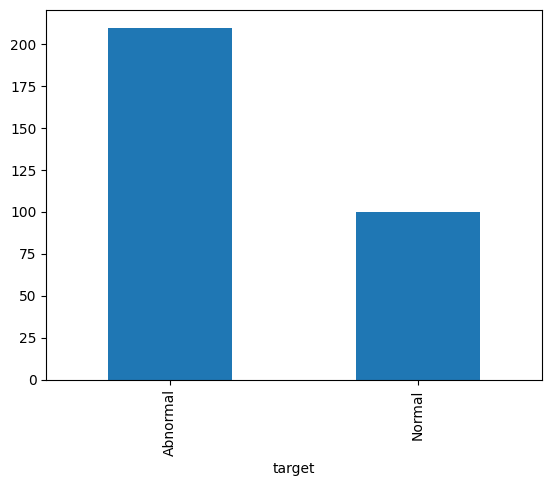

In [9]:
# Change the Column names to be sensable
df.rename(columns = {
    "Col1" : "pelvic_incidence",
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope",
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis",
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope",
    "Col10" :"cervical_tilt",
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope",
    "Class_att" : "target"}, inplace=True)
# How skewed is the data?
df["target"].value_counts().sort_index().plot.bar()

In [10]:
# Convert categorical to numeric {"Abnormal":0, Normal:1}
df.target = df.target.astype("category").cat.codes
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,target
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [11]:
# 88% Accuracy
dataset = df[["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","target"]]

In [12]:
# Separate input and output
y = dataset.target
X = dataset.drop("target", axis=1)

In [13]:
# Split data between train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# List models
#from sklearn import datasets
from sklearn.cluster import KMeans
models =  [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,GradientBoostingClassifier, SVC]

In [15]:
# Train & Predict models
acc_list = []
name_list =[]
for model in models:
    clf = model()
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    name_list.append((model).__name__)
    acc_list.append(classification_report(y_test,predictions,output_dict=True)["accuracy"])
    print((model).__name__," --> ",classification_report(y_test,predictions,output_dict=True)["accuracy"])

LogisticRegression  -->  0.8640776699029126
DecisionTreeClassifier  -->  0.8058252427184466
RandomForestClassifier  -->  0.7961165048543689
GradientBoostingClassifier  -->  0.7961165048543689
SVC  -->  0.7961165048543689


In [16]:
# Make a dataframe
team = pd.DataFrame(list(zip(name_list,acc_list)))
team.columns =['Name', "Accuracy"]
team

,Name,Accuracy
0,LogisticRegression,0.864078
1,DecisionTreeClassifier,0.805825
2,RandomForestClassifier,0.796117
3,GradientBoostingClassifier,0.796117
4,SVC,0.796117


(0.7, 1.0)

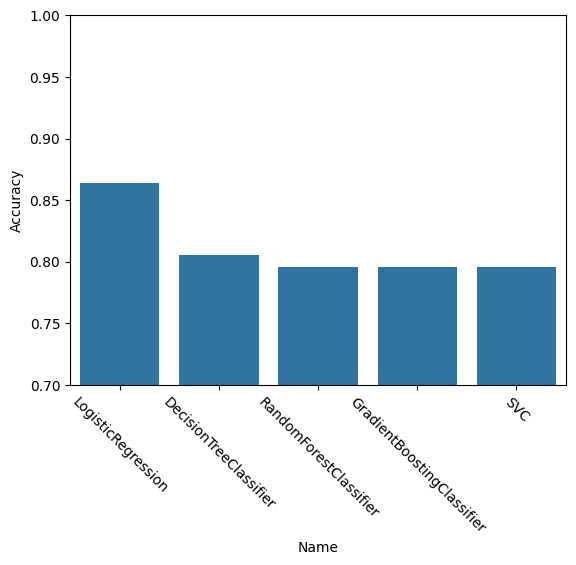

In [17]:
# Render a Chart
sns.barplot(x=team["Name"], y=team["Accuracy"],data=team)

# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylim(0.7, 1)

The silhouette score is a metric used to evaluate the quality of clusters in a clustering model. It measures how well-separated the clusters are from each other.

The silhouette score for a data point is calculated as follows:



* silhouette_score(i) = (b(i) - a(i)) / max(a(i), b(i))

where:


* a(i) is the average distance between data point i and all other data points in its cluster.

* b(i) is the average distance between data point i and all data points in the nearest neighboring cluster.

The silhouette score can range from -1 to 1. A score of 1 indicates that the data point is well-separated from other clusters. A score of 0 indicates that the data point is on the border of two clusters. A score of -1 indicates that the data point is poorly-separated from other clusters.

The average silhouette score for a clustering model is calculated by averaging the silhouette scores for all data points in the model.

The silhouette score is a useful metric for evaluating the quality of clusters, but it is not without its limitations. For example, the silhouette score can be misleading if the clusters are not well-separated or if the data is not evenly distributed.

**How to interpret the silhouette score:**


*  A silhouette score close to 1 indicates that the clusters are well-separated.
* A silhouette score close to 0 indicates that the clusters are overlapping.


* A silhouette score close to -1 indicates that the data is not well-clustered.



**When to use the silhouette score:**


*  The silhouette score is a good metric to use when you are comparing different clustering models.
*   The silhouette score can also be used to identify outliers in your data.




**Limitations of the silhouette score:**


*   The silhouette score can be misleading if the clusters are not well-separated or if the data is not evenly distributed.
*  The silhouette score is not a good metric to use when you have a large number of clusters.





In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=2, random_state=42)

In [19]:
# Fit the KMeans model
km.fit_predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

In [20]:
# Calculate Silhoutte Score
score = silhouette_score(X_train, km.labels_, metric='euclidean')

In [21]:
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.478


In [22]:
!pip install yellowbrick

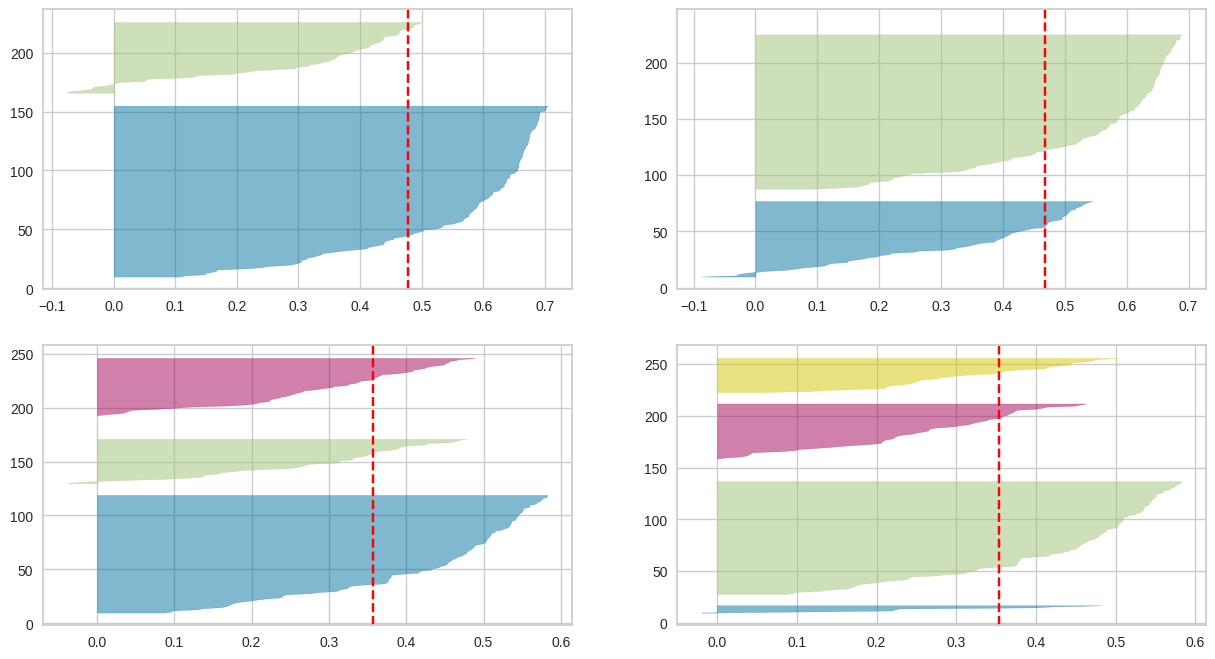

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i,random_state=42)
    q, mod = divmod(i, 2)
    '''
   # Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)

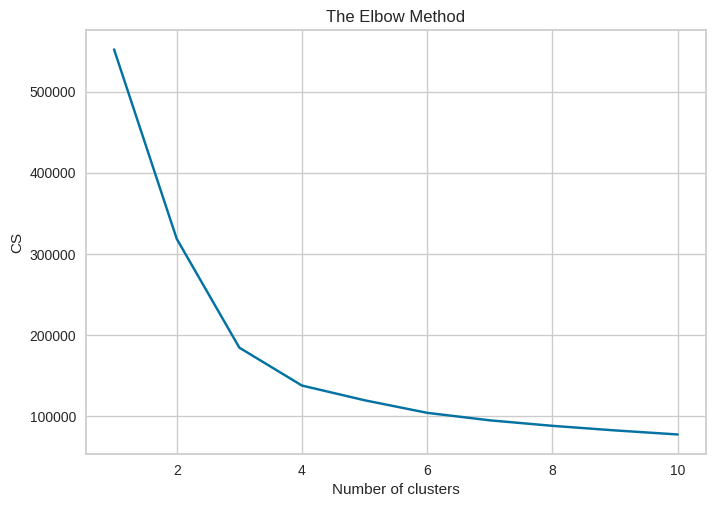

In [24]:
from sklearn.cluster import KMeans
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()